In [6]:
import sys
import os
import numpy as np
import xlsxwriter as xlsx
from scipy import optimize
import random
import math
from math import floor
import pickle
import uuid
import itertools
import pdb
from scipy.optimize import curve_fit
from copy import copy, deepcopy

sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master")
from Core_Definition import *
from Auto_Algorithm import *
from Visualization import *
from data_analysis import *
from SPAM import *
import json


sys.path.append(r"/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation")
import EAB_process_modified 
from EAB_CB_data_analysis import *
import bootstrap

In [7]:
def load_datafile_into_dic (path2files,info):
    '''
    load data file stored in path2files into a dictionary dataset
    dataset["info"]: information about data set string
    dataset["path"]: path2files string
    dataset["datafiles"]: list of all filenames
    dataset["datafileIdx"]: list of line numbers in ascending order
    '''
    dataset={}
    dataset["info"]=info
    dataset["path"]=path2files
    dataset["datafiles"],dataset["datafileIdx"]=load_datafile_ordered(dataset["path"])
    return dataset


In [8]:
# circ_path="/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt"
# c_d2=[]
# load_circuit_file(c_d2,circ_path)

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=2.txt", 'r')
# Lines= file.readlines()
# c_d2=[]
# count = 0
# for line in Lines:
#     c_d2.append(line)
#     count += 1
# print (count)
# count=0

# # file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=4.txt", 'r')
# # Lines= file.readlines()
# # c_d4=[]
# # count = 0
# # for line in Lines:
# #     c_d4.append(line)
# #     count += 1
# # print (count)
# # count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=8.txt", 'r')
# Lines= file.readlines()
# c_d8=[]
# count = 0
# for line in Lines:
#     c_d8.append(line)
#     count += 1
# print (count)
# count=0

# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=16.txt", 'r')
# Lines= file.readlines()
# c_d16=[]
# count = 0
# for line in Lines:
#     c_d16.append(line)
#     count += 1
# print (count)
# count=0


# file=open(r"/Volumes/funkflower/Labs/Gates/AutoAlgorithms/EAB/idleioninthemiddle/02062024EABmapping45213_FT/d=32.txt", 'r')
# Lines= file.readlines()
# c_d32=[]
# count = 0
# for line in Lines:
#     c_d32.append(line)
#     count += 1
# print (count)
# count=0



In [9]:
dataset_150us_XXasDelay=[]

list_path=["/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240402/2024-04-02 ramsey_150us_16/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240402/2024-04-02 ramsey_150_32/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240402/2024-04-02 Ramsey_150us_64gates/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240402/2024-04-02 Ramsey_150us_100gates/"
          ]

list_info=["",
              "",
              "",
              ""]

for i in range(len(list_path)):
    dataset_150us_XXasDelay.append(load_datafile_into_dic(list_path[i],list_info[i]))


dataset_150us_AWGwait=[]

list_path=["/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait150us16gates/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait150us32gates/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait150us64gates/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait150us128gates/"
          ]

list_info=["",
              "",
              "",
              ""]

for i in range(len(list_path)):
    dataset_150us_AWGwait.append(load_datafile_into_dic(list_path[i],list_info[i]))



dataset_75us_AWGwait=[]

list_path=["/Volumes/funkflower/Labs/Gates/Data/2024/20240404/2024-04-04 _32gates_AWGwait75/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/20240404/2024-04-04 __64gates_75us/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240404/2024-04-04 __128gates_75us/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240404/2024-04-04 __AWGwait75us160gates/"
          ]

list_info=["",
              "",
              "",
              ""]

for i in range(len(list_path)):
    dataset_75us_AWGwait.append(load_datafile_into_dic(list_path[i],list_info[i]))


dataset_AWGwait300us_noDelay=[]

list_path=["/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait300us16gates_noDD/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait300us32gates_noDD/",
           "/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240405/2024-04-05 __AWGwait300us64gates_noDD/"
          ]

list_info=["",
              "",
              "",
              "",
          ""]

for i in range(len(list_path)):
    dataset_AWGwait300us_noDelay.append(load_datafile_into_dic(list_path[i],list_info[i]))




# The following set of data has no actual delay because of programming errors.
# dataset_300us_XXasDelay=[]

# list_path=["/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_4gates/",
#            "/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_16gates/",
#            "/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_32gates/",
#            "/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_64gates/",
#            "/Volumes/funkflower/Labs/Gates/Data/2024/202403/20240327/2024-03-27 Ramsey_DD_Y_300us_100gates/"
#           ]

# list_info=["",
#               "",
#               "",
#               "",
#           ""]

# for i in range(len(list_path)):
#     dataset_300us_XXasDelay.append(load_datafile_into_dic(list_path[i],list_info[i]))




In [10]:
# print (dataset_150us_XXasDelay[0])
print (dataset_75us_AWGwait[2])

{'info': '', 'path': '/Volumes/funkflower/Labs/Gates/Data/2024/202404/20240404/2024-04-04 __128gates_75us/', 'datafiles': ['2024-04-04-171214_Line_001.txt', '2024-04-04-171345_Line_002.txt', '2024-04-04-171516_Line_003.txt', '2024-04-04-171647_Line_004.txt', '2024-04-04-171817_Line_005.txt', '2024-04-04-171948_Line_006.txt', '2024-04-04-172119_Line_007.txt', '2024-04-04-172250_Line_008.txt', '2024-04-04-172421_Line_009.txt', '2024-04-04-172553_Line_010.txt', '2024-04-04-172724_Line_011.txt', '2024-04-04-172855_Line_012.txt', '2024-04-04-180613_Line_014.txt', '2024-04-04-180742_Line_015.txt', '2024-04-04-180912_Line_016.txt', '2024-04-04-182237_Line_017.txt', '2024-04-04-182407_Line_018.txt'], 'datafileIdx': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18]}


In [13]:
# add_new_path=[""]
# add_new_info=[""]
# if (path in add_new_path !=""):
#     for i in range(len(list_path)):
#         dataset_150us_XXasDelay.append(load_datafile_into_dic(list_path[i],list_info[i]))



# 150 us*2 wait between DD pulse

In [14]:
C=30
Set_Mapping([2,1])
nqubit=2
# results_d2=np.zeros((C,2**(nqubit)))
# results_d4=np.zeros((C,2**(nqubit)))
# results_d8=np.zeros((C,2**(nqubit)))

# results_150us_16gates_traced=np.zeros((C,2**(1)))
# results_150us_32gates_traced=np.zeros((C,2**(1)))
# results_150us_64gates_traced=np.zeros((C,2**(1)))
# results_150us_100gates_traced=np.zeros((C,2**(1)))

a=Quantum_State(nqubit)
a_s=Quantum_State(nqubit)
b_c=Quantum_Circuit(nqubit,"qc")

a_comp2=Quantum_State(nqubit)
a_comp=Quantum_State(nqubit)

# spam1=SPAM_Operator(5)
# spam1.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM1/SPAM1.csv")

# spam2=SPAM_Operator(5)
# spam2.Import("/Volumes/funkflower/Users/Yingyue/Gates_Lab_Suite-master/PauliNoiseEstimation/data/0711/SPAM2/SPAM2.csv")
l_contrast=[]

In [15]:
pi=math.pi
# this function is hard to use in fit for some reason
def test_func(x, a, b, c,d):
    return a * np.sin(2*pi/b * x + pi*c)+d


def test_func_1(x, a, b, c, d):
    return a * np.sin(b * x + c)+d


def monoExp(x, m, t, b):
    return m * np.exp(-1/t * x) + b

# 300us between DD pulses  (150us XX scale0 as delay)

In [16]:
# filenames_data=[]
# brightpop={}
# brightpop_150us={}
# num_of_gates=[16,32,64,100]
# n=0
# for dataset in dataset_150us_XXasDelay:
#     numofgates=num_of_gates[n]
#     brightpop[numofgates]=[]
#     filenames_data=dataset["datafiles"].copy()
#     paf_data=dataset["path"]
#     fileIdx=dataset["datafileIdx"]
#     for i in range (len(fileIdx)):
#         Idx=fileIdx[i]
#         # print (filenames_data[i])
#         a.Import(paf_data+filenames_data[i],keep_file=True)
#         data_traced=Trace_Out(a,[0])
#         brightpop[numofgates].append(data_traced.population[1])
#     # print (data_traced.population)
#     n+=1
# brightpop_150us= brightpop.copy()   
# l_contrast_150us_XXasDelay=[]
# x_c=np.linspace(0,30,num=300)
# for i in range (len(num_of_gates)):
#     plt.plot(brightpop_150us[num_of_gates[i]],"*",label= str(num_of_gates[i])+"gates experiment")
#     params, params_covariance = optimize.curve_fit(test_func_1, list(range(30)),brightpop_150us[num_of_gates[i]], p0=[0.5, 2*pi/10 ,0.5, 0.5])
#     print (params)
#     plt.plot(x_c,test_func_1(x_c,params[0],params[1],params[2],params[3]))
#     l_contrast_150us_XXasDelay.append(params[0])
# plt.xticks([0,15,30],["0","$3\pi$","$6\pi$"])

# plt.legend()

In [17]:
# 300us between DD (150us AWGwait)

[0.49442032328161245, 0.48814153115943437, 0.46982243778052446, 0.4648382391898019]
[-3.17930552e+02 -1.20982508e+06  3.18425626e+02]


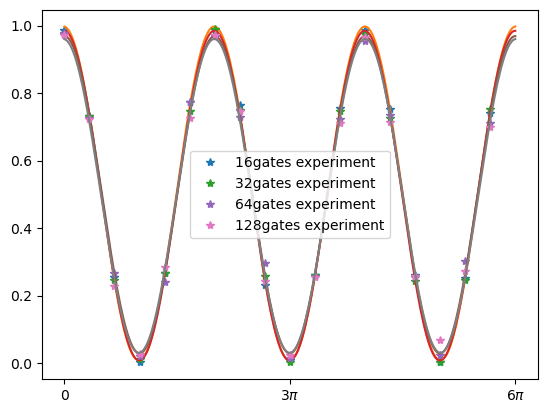

In [18]:
filenames_data=[]
brightpop={}
brightpop_150us={}
num_of_gates=[16,32,64,128]
n=0
for dataset in dataset_150us_AWGwait:
    numofgates=num_of_gates[n]
    brightpop[numofgates]=[]
    filenames_data=dataset["datafiles"].copy()
    paf_data=dataset["path"]
    fileIdx=dataset["datafileIdx"]
    for i in range (len(fileIdx)):
        Idx=fileIdx[i]
        # print (filenames_data[i])
        a.Import(paf_data+filenames_data[i],keep_file=True)
        data_traced=Trace_Out(a,[0])
        brightpop[numofgates].append(data_traced.population[1])
    # print (data_traced.population)
    n+=1
brightpop_150us= brightpop.copy()   
l_contrast_150us_AWGwait=[]
x_c=np.linspace(0,18,num=300)
for i in range (len(num_of_gates)):
    # plt.plot(brightpop_150us[num_of_gates[i]],"*",label= str(num_of_gates[i])+"gates experiment")
    plt.plot([m-1 for m in dataset_150us_AWGwait[i]["datafileIdx"]],brightpop_150us[num_of_gates[i]],"*",label= str(num_of_gates[i])+"gates experiment")
    params, params_covariance = optimize.curve_fit(test_func_1, [m-1 for m in dataset_150us_AWGwait[i]["datafileIdx"]],brightpop_150us[num_of_gates[i]], p0=[0.5, 2*pi/6 ,0.5, 0.5])
    # print (params)
    plt.plot(x_c,test_func_1(x_c,params[0],params[1],params[2],params[3]))
    l_contrast_150us_AWGwait.append(params[0])
plt.xticks([0,9,18],["0","$3\pi$","$6\pi$"])
plt.legend()
print (l_contrast_150us_AWGwait)
params, params_covariance = optimize.curve_fit(monoExp,num_of_gates ,l_contrast_150us_AWGwait, p0=[0.5, 800 ,0])
print (params)

In [19]:
# Can't really fit. Decay time is too short

In [20]:
# 150 between DD us AWGwait

[0.49210460821375573, 0.46741437141426206, 0.43445284816072355, 0.42713696379234795]
[-5.09277133e+02 -1.00054358e+06  5.09781277e+02]


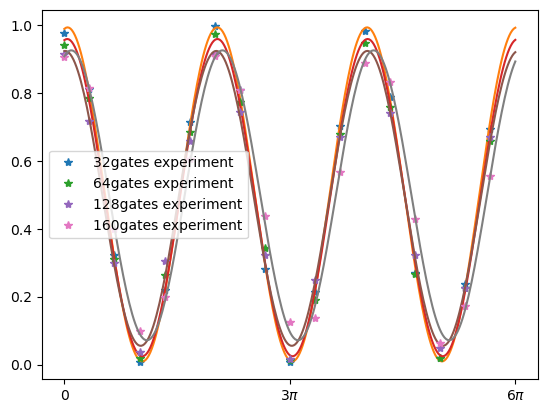

In [21]:
filenames_data=[]
brightpop={}
brightpop_75us={}
num_of_gates=[32,64,128,160]
n=0
for dataset in dataset_75us_AWGwait:
    numofgates=num_of_gates[n]
    brightpop[numofgates]=[]
    filenames_data=dataset["datafiles"].copy()
    paf_data=dataset["path"]
    fileIdx=dataset["datafileIdx"]
    # print (len(fileIdx))
    for i in range (len(fileIdx)):
        Idx=fileIdx[i]
        # print (i)
        # print (filenames_data[i])
        a.Import(paf_data+filenames_data[i],keep_file=True)
        data_traced=Trace_Out(a,[0])
        brightpop[numofgates].append(data_traced.population[1])
        
    # print (data_traced.population)
    n+=1
brightpop_75us= brightpop.copy()   


l_contrast_75us=[]
x_c=np.linspace(0,18,num=300)
for i in range (len(num_of_gates)):
    plt.plot([m-1 for m in dataset_75us_AWGwait[i]["datafileIdx"]],brightpop_75us[num_of_gates[i]],"*",label= str(num_of_gates[i])+"gates experiment")
    # params, params_covariance = optimize.curve_fit(test_func_1, list(range(18)),brightpop_75us[num_of_gates[i]], p0=[0.5, 2*pi/6 ,0.5, 0.5])
    params, params_covariance = optimize.curve_fit(test_func_1, [m-1 for m in dataset_75us_AWGwait[i]["datafileIdx"]],brightpop_75us[num_of_gates[i]], p0=[0.5, 2*pi/6 ,0.5, 0.5])
    # print (params)
    plt.plot(x_c,test_func_1(x_c,params[0],params[1],params[2],params[3]))
    l_contrast_75us.append(params[0])
plt.legend()
plt.xticks([0,9,18],["0","$3\pi$","$6\pi$"])
print (l_contrast_75us)
params, params_covariance = optimize.curve_fit(monoExp,num_of_gates ,l_contrast_75us, p0=[0.5, 800 ,0])
print (params)

[0.45077517893226704, 0.4535697139922961, 0.4500880452745715]
[ 1.53464431e+01  5.51694126e+05 -1.48939270e+01]


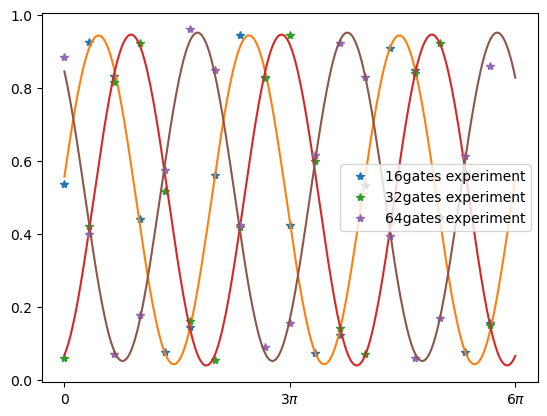

In [23]:
filenames_data=[]
brightpop={}
brightpop_300us_noDD={}
num_of_gates=[16,32,64]
n=0
for dataset in dataset_AWGwait300us_noDelay:
    numofgates=num_of_gates[n]
    brightpop[numofgates]=[]
    filenames_data=dataset["datafiles"].copy()
    paf_data=dataset["path"]
    fileIdx=dataset["datafileIdx"]
    # print (len(fileIdx))
    for i in range (len(fileIdx)):
        Idx=fileIdx[i]
        # print (i)
        # print (filenames_data[i])
        a.Import(paf_data+filenames_data[i],keep_file=True)
        data_traced=Trace_Out(a,[0])
        brightpop[numofgates].append(data_traced.population[1])
        
    # print (data_traced.population)
    n+=1
brightpop_300us_noDD= brightpop.copy()   


l_contrast_300us_noDD=[]
x_c=np.linspace(0,18,num=300)
for i in range (len(num_of_gates)):
    plt.plot([m-1 for m in dataset_AWGwait300us_noDelay[i]["datafileIdx"]],brightpop_300us_noDD[num_of_gates[i]],"*",label= str(num_of_gates[i])+"gates experiment")
    # params, params_covariance = optimize.curve_fit(test_func_1, list(range(18)),brightpop_75us[num_of_gates[i]], p0=[0.5, 2*pi/6 ,0.5, 0.5])
    params, params_covariance = optimize.curve_fit(test_func_1, [m-1 for m in dataset_AWGwait300us_noDelay[i]["datafileIdx"]],brightpop_300us_noDD[num_of_gates[i]], p0=[0.5, 2*pi/6 ,0.5, 0.5])
    # print (params)
    plt.plot(x_c,test_func_1(x_c,params[0],params[1],params[2],params[3]))
    l_contrast_300us_noDD.append(params[0])
plt.legend()
plt.xticks([0,9,18],["0","$3\pi$","$6\pi$"])
print (l_contrast_300us_noDD)
params, params_covariance = optimize.curve_fit(monoExp,num_of_gates ,l_contrast_300us_noDD, p0=[0.5, 800 ,0])
print (params)

plt.plot()

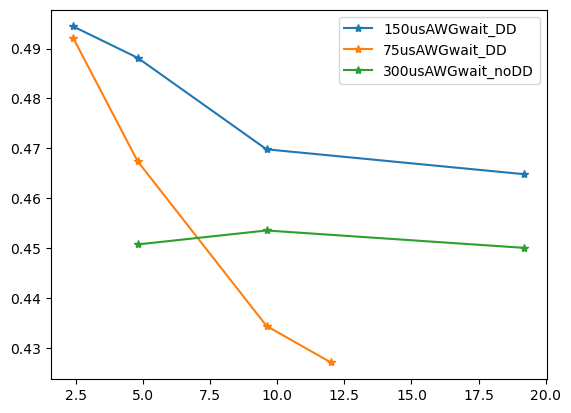

In [35]:
plt.figure()
plt.plot([x*150/1000 for x in[16,32,64,128]],l_contrast_150us_AWGwait,"*-",label="150usAWGwait_DD")
plt.plot([x*75/1000 for x in[32,64,128,160]],l_contrast_75us,"*-",label="75usAWGwait_DD")
plt.plot([x*300/1000 for x in[16,32,64]],l_contrast_300us_noDD,"*-",label="300usAWGwait_noDD")
plt.legend()

# 300 us*2 wait between DD pulse

In [66]:
results_300us_4gates_traced=np.zeros((C,2**(1)))
results_300us_16gates_traced=np.zeros((C,2**(1)))
results_300us_32gates_traced=np.zeros((C,2**(1)))
results_300us_64gates_traced=np.zeros((C,2**(1)))
results_300us_100gates_traced=np.zeros((C,2**(1)))

In [67]:
filenames_data=[]
filenames_data=dataset5["datafiles"].copy()
paf_data=dataset5["path"]
fileIdx=dataset5["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_4gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset6["datafiles"].copy()
paf_data=dataset6["path"]
fileIdx=dataset6["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_16gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset7["datafiles"].copy()
paf_data=dataset7["path"]
fileIdx=dataset7["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_32gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset8["datafiles"].copy()
paf_data=dataset8["path"]
fileIdx=dataset8["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_64gates_traced[i]= data_traced.population

filenames_data=[]
filenames_data=dataset9["datafiles"].copy()
paf_data=dataset9["path"]
fileIdx=dataset9["datafileIdx"]
for i in range (len(fileIdx)):
    Idx=fileIdx[i]
    print (filenames_data[i])
    a.Import(paf_data+filenames_data[i],keep_file=True)
    data_traced=Trace_Out(a,[0])
    results_300us_100gates_traced[i]= data_traced.population

2024-03-27-191426_Line_001.txt
2024-03-27-191433_Line_002.txt
2024-03-27-191440_Line_003.txt
2024-03-27-191447_Line_004.txt
2024-03-27-191454_Line_005.txt
2024-03-27-191500_Line_006.txt
2024-03-27-191508_Line_007.txt
2024-03-27-191515_Line_008.txt
2024-03-27-191522_Line_009.txt
2024-03-27-191529_Line_010.txt
2024-03-27-191536_Line_011.txt
2024-03-27-191543_Line_012.txt
2024-03-27-191550_Line_013.txt
2024-03-27-191557_Line_014.txt
2024-03-27-191604_Line_015.txt
2024-03-27-191610_Line_016.txt
2024-03-27-191618_Line_017.txt
2024-03-27-191625_Line_018.txt
2024-03-27-191631_Line_019.txt
2024-03-27-191639_Line_020.txt
2024-03-27-191646_Line_021.txt
2024-03-27-191653_Line_022.txt
2024-03-27-191700_Line_023.txt
2024-03-27-191707_Line_024.txt
2024-03-27-191714_Line_025.txt
2024-03-27-191721_Line_026.txt
2024-03-27-191727_Line_027.txt
2024-03-27-191735_Line_028.txt
2024-03-27-191742_Line_029.txt
2024-03-27-191749_Line_030.txt
2024-03-27-190817_Line_001.txt
2024-03-27-190825_Line_002.txt
2024-03-

[ 0.49133423  9.99754629 -0.50030056  0.50761662]
[ 0.49140588 10.00030803 -0.50103117  0.50152705]


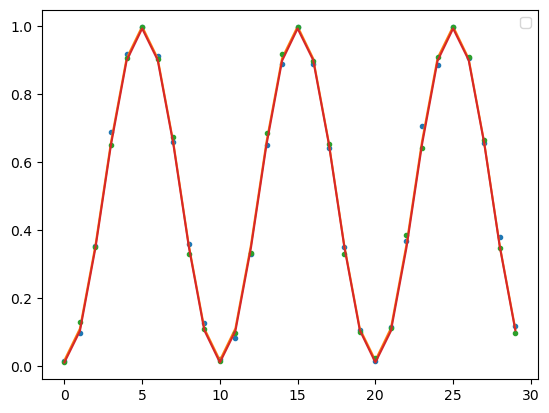

Error in atexit._run_exitfuncs:
Traceback (most recent call last):
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3875, in atexit_operations
    self._atexit_once()
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3854, in _atexit_once
    self.reset(new_session=False)
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 1373, in reset
    self.history_manager.reset(new_session)
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/site-packages/IPython/core/history.py", line 597, in reset
    self.dir_hist[:] = [Path.cwd()]
  File "/Users/yzhu/anaconda3/envs/snowflakes/lib/python3.8/pathlib.py", line 1096, in cwd
    return cls(os.getcwd())
FileNotFoundError: [Errno 2] No such file or directory


In [71]:
plt.plot(results_300us_4gates_traced[:,0],".")
params, params_covariance = optimize.curve_fit(test_func, range(30),results_300us_4gates_traced[:,0], p0=[0.5, 10 ,0, 0.5])
print (params)
plt.plot(range(30),test_func(range(30),params[0],params[1],params[2],params[3]))
# plt.plot(results_150us_32gates_traced[:,0],".")
plt.plot(results_150us_64gates_traced[:,0],".")
# plt.plot(results_300us_100gates_traced[:,0],".")
params, params_covariance = optimize.curve_fit(test_func, range(30),results_300us_64gates_traced[:,0], p0=[0.5, 10 ,0, 0.5])
print (params)
plt.plot(range(30),test_func(range(30),params[0],params[1],params[2],params[3]))
plt.legend ("")

In [65]:
print (data_traced.population)

[0.35124999999999995, 0.6487499999999999]


64 XXgates= 300us*64=19.2ms. Look at Raman Ramsey contrast
